In [14]:
import sys, os

import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['Droid Sans Fallback'] # 中文显示

import sympy as sp

%matplotlib inline

In [7]:
%%HTML
<button onclick="$('.input, .prompt, .output_stderr, .output_error, .output_result').toggle();">toggle code</button>

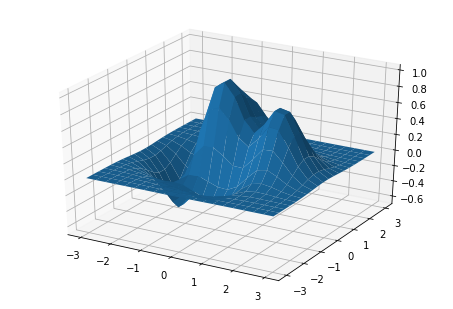

In [8]:
def f(x, y):
    return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2)

x = np.linspace(-3, 3, 20)
y = np.linspace(-3, 3, 20)
xx, yy = np.meshgrid(x, y)
z = f(xx, yy)

# 普通3d图
ax = Axes3D(plt.figure())
ax.plot_surface(xx, yy, z)

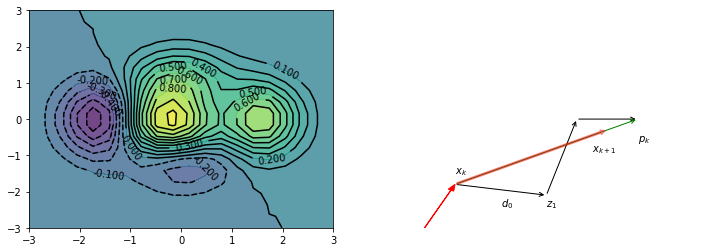

In [9]:
# 等高线2d图
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.contourf(xx, yy, z, 20, alpha=.75) # 20等级, 绘制填充
cts = plt.contour(xx, yy, z, 20, colors='black') # 绘制轮廓线
plt.clabel(cts, inline=True, fontsize=10) # 添加高度标识

# arrows & annotations
# make demo for cg tutorial
import matplotlib.patches as mp

isLineSearch = True

# plt.figure(figsize=(4, 4), dpi=150)
plt.subplot(122)
# plt.ylim([.0, .6])
plt.axis('off')

# trace
# arrows
lst = [.2, .2, .5, .15, .6, .5, .8, .5]
for i in range(len(lst)//2-1):
    plt.annotate('', xytext=(lst[2*i], lst[2*i+1]), xy=(lst[2*i+2], lst[2*i+3]), arrowprops={'arrowstyle': '->'})
plt.arrow(.1, 0., .1, .2,  color='r', head_width=.02, length_includes_head=True)

# strings
lstt = [.2, .25, '$x_k$', 
        .65, .35, '$x_{k+1}$', 
        .8, .4, '$p_k$', 
        .5, .1, '$z_1$', 
        .35, .1, '$d_0$', 
       ]
for i in range(0, len(lstt), 3):
    plt.text(lstt[i], lstt[i+1], lstt[i+2], )

if isLineSearch:
    # search direction
    plt.annotate('', xytext=(.2, .2), xy=(.8, .5), arrowprops={'arrowstyle': '->', 'color': 'g', })
    # step
    plt.annotate('', xytext=(.2, .2), xy=(.7, .45), arrowprops={'arrowstyle': 'simple', 'color': 'r', 'alpha': .4})
else:
    # trust region
    ax = plt.gca()
    ax.add_patch(mp.Circle(xy=(.2, .2), radius=.55, alpha=.4, color='g', fill=False))
    plt.annotate('', xytext=(.2, .2), xy=(.67, .5), arrowprops={'arrowstyle': 'simple', 'color': 'b', 'alpha': .4})

Text(0.5,1,'拟合')

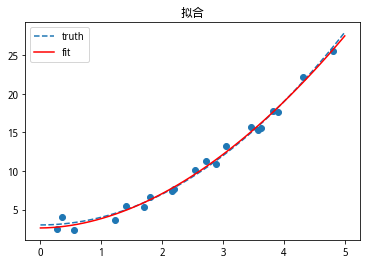

In [15]:
import scipy.optimize as opt

def fitfunc(x, a, b, c):
    return a*x**b+c

a, b, c = 1, 2, 3
xs = np.random.rand(20)*5
ys = a*xs**b+c+(np.random.rand(20)-0.5)*2
prm, cov = opt.curve_fit(fitfunc, xs, ys)

# plot
plt.scatter(xs, ys)
xf = np.linspace(0, 5, )
yt = fitfunc(xf, a, b, c)
yf = fitfunc(xf, prm[0], prm[1], prm[2])
plt.plot(xf, yt, '--', label='truth')
plt.plot(xf, yf, 'r', label='fit')
plt.legend()
plt.title('拟合')